<a href="https://colab.research.google.com/github/Ramprabu95/AI_based_image_compression/blob/main/canopy_fuel_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1: Loading LAZ file and excel file

The LAZ files and the excel sheel containing the surface plot are stored in Google Drive. The first Task is to load the data.

In [1]:
!pip install laspy[laszip]
import laspy
import numpy as np
from mpl_toolkits import mplot3d

     |████████████████████████████████| 597 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 306 kB 70.1 MB/s 
  Created wheel for laspy: filename=laspy-2.1.1-py3-none-any.whl size=52673 sha256=16e7915ded5b76e308c35135ac054873acfcd19a4fbc50b9aaee05f0ffc34f0e
  Stored in directory: /root/.cache/pip/wheels/44/36/8a/f74574f004a1e730d19c39e2c83c95c96cbeb256fa06ccc7dc
Successfully built laspy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_name = "/content/drive/MyDrive/Colab Notebooks/lidarfiles/"
file_name = "CNI2020_C2_383000_4023000.laz"
# X and Y are hardcoded - This should be generalized later
X_center = 383769.697621266
Y_center = 4023229
file_path = folder_name+file_name
compressed_file = laspy.read(file_path)

In [4]:
uncompressed_file = laspy.convert(compressed_file)
import numpy as np
plot_region = laspy.create(point_format = uncompressed_file.header.point_format, file_version = uncompressed_file.header.version)
x_grid = X_center*np.ones(uncompressed_file.x.shape)
y_grid = Y_center*np.ones(uncompressed_file.y.shape)
segment = laspy.create(point_format = uncompressed_file.header.point_format, file_version = uncompressed_file.header.version)
segment.points = uncompressed_file.points[((uncompressed_file.x-x_grid)**2)+((uncompressed_file.y-y_grid)**2)<=121]
uncompressed_file.x

<ScaledArrayView([383002.898 383003.431 383003.614 ... 383998.648 383995.222 383997.683])>

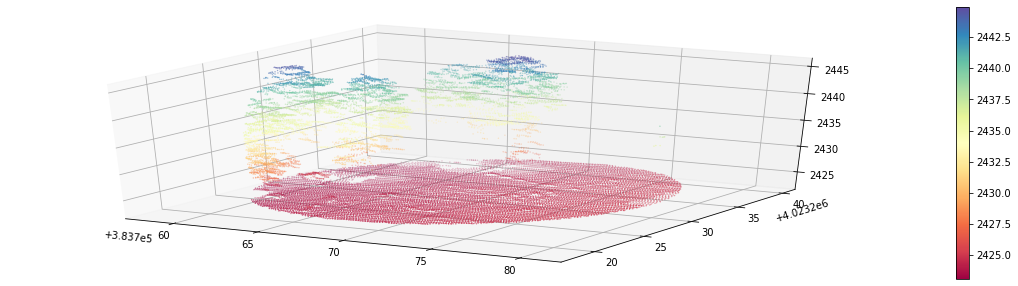

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[20, 5])
ax = plt.axes(projection='3d')
sc = ax.scatter(segment.x, segment.y, segment.z, c=segment.z ,s=0.1, marker='o', cmap="Spectral")
plt.colorbar(sc)
plt.show()

# Task2 : Finding individual tree
In the area identified, individual trees are to be isolated and classified


In [6]:
!pip install git+https://github.com/manaakiwhenua/pycrown.git

  Cloning https://github.com/manaakiwhenua/pycrown.git to /tmp/pip-req-build-26s7y6a7
  Running command git clone -q https://github.com/manaakiwhenua/pycrown.git /tmp/pip-req-build-26s7y6a7
     |████████████████████████████████| 31.2 MB 362 kB/s 
     |████████████████████████████████| 8.9 MB 48.4 MB/s 
     |████████████████████████████████| 888 kB 73.8 MB/s 
     |████████████████████████████████| 994 kB 71.4 MB/s 
     |████████████████████████████████| 16.7 MB 83.1 MB/s 
     |████████████████████████████████| 19.3 MB 86.1 MB/s 
     |████████████████████████████████| 6.3 MB 74.6 MB/s 
  Created wheel for PyCrown: filename=PyCrown-0.2-cp37-cp37m-linux_x86_64.whl size=290295 sha256=50717f1b366fbb643bacf26a550bdc0300687c6188f0aee215cd7bc67c71b1fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdhm0u0c/wheels/31/55/c4/b8fa7e1c744a608ac60efa433f597100127a7d2f47d89345a6
Successfully built PyCrown
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstal

In [10]:
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
!conda install -y -q -c conda-forge python-pdal

--2022-02-09 12:32:55--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-02-09 12:32:55--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   208MB/s    in 0.3s    

2022-02-09 12:32:56 (208 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_